<a href="https://colab.research.google.com/github/tmq24/MachineLearning/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem.
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

**Submit Link**: https://forms.gle/CwmpBrfa2SYQic7G6

## Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive

# drive.mount("/content/drive")

In [ ]:
import gdown

url = f"https://drive.google.com/uc?id=1siVo2_4AWYwGXvtzTPASIbYdoG7Yv_U8"

output = "TravelInsurancePrediction.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1siVo2_4AWYwGXvtzTPASIbYdoG7Yv_U8
To: /content/TravelInsurancePrediction.csv
100%|██████████| 115k/115k [00:00<00:00, 51.5MB/s]


'TravelInsurancePrediction.csv'

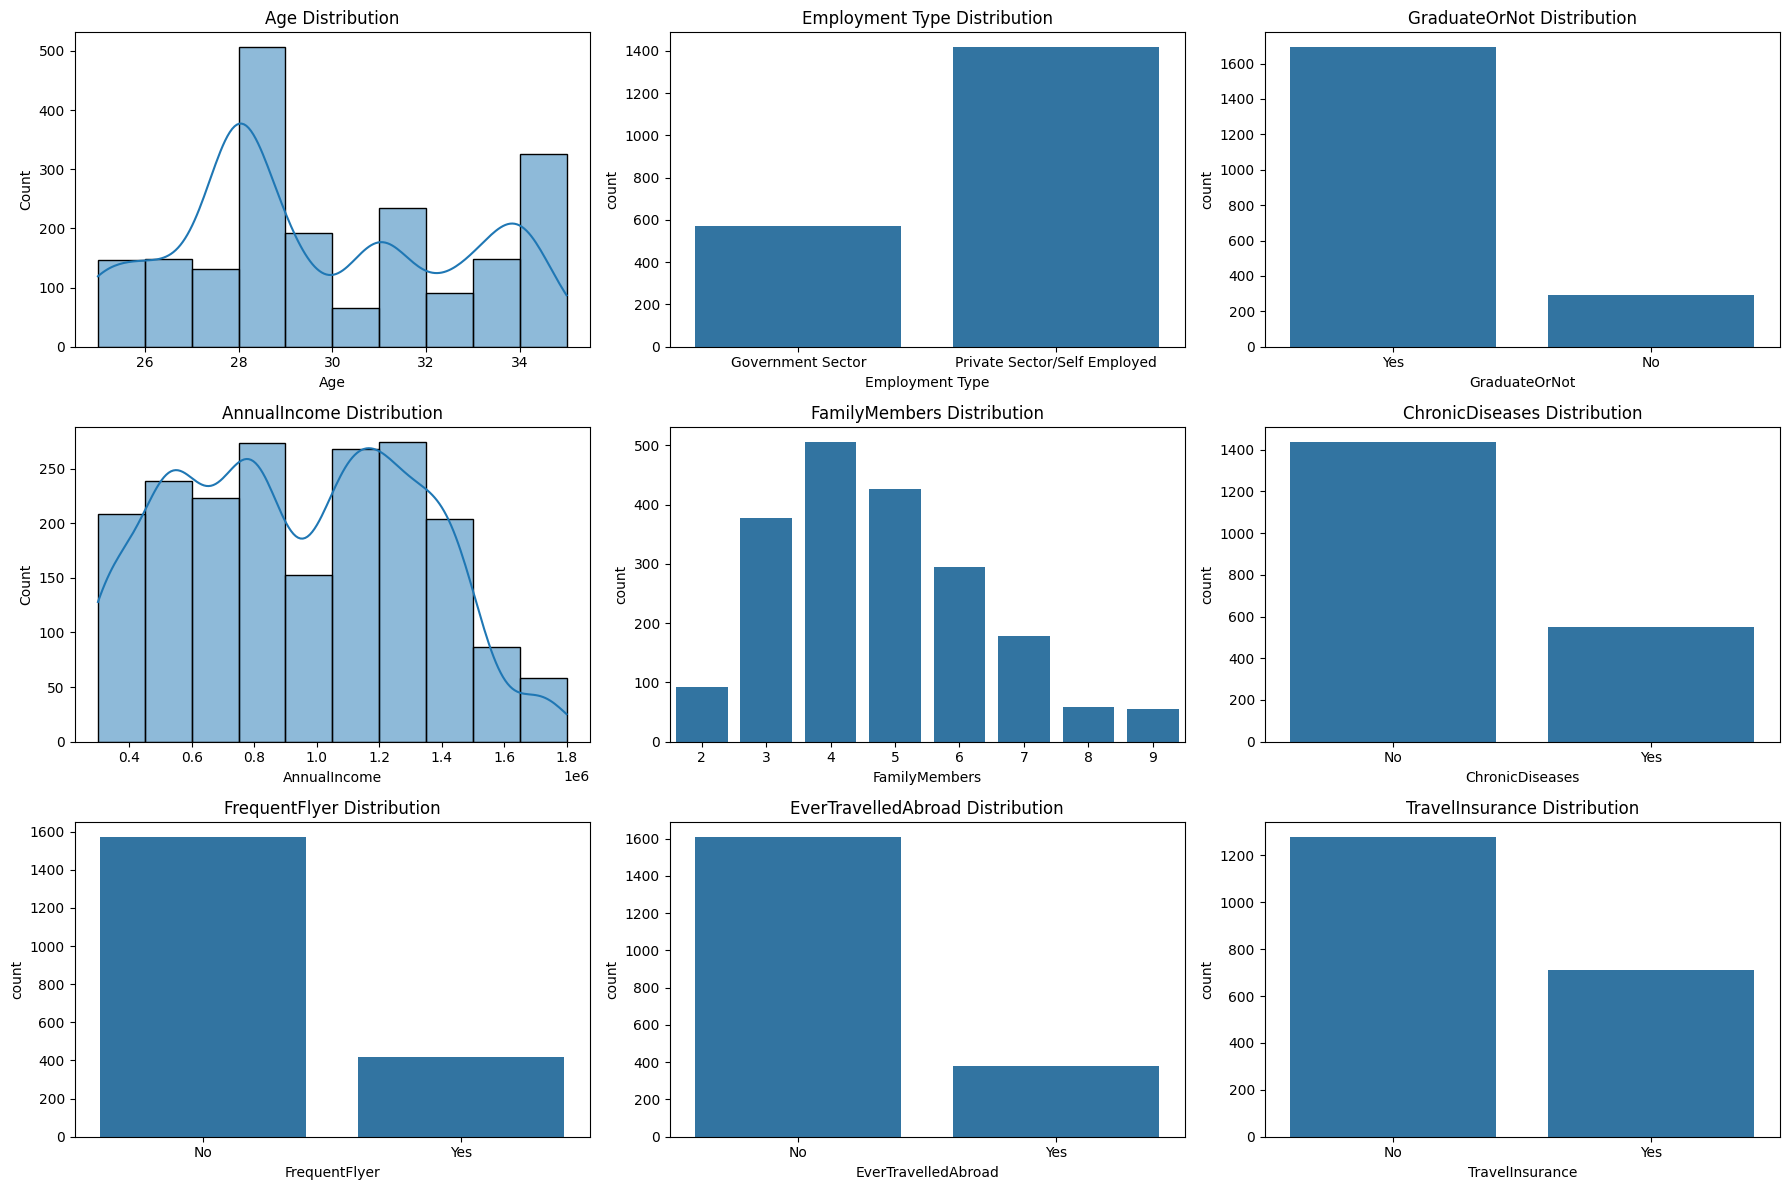

In [ ]:
import pandas as pd
PATH = "/content/TravelInsurancePrediction.csv" # Path to your file

df = pd.read_csv(PATH)
df.head()
#ToDo: Show histogram of dataframedf_copy = df.copy()
cols_to_plot = df.columns[1:]

plt.figure(figsize=(18, 12))

for i, col in enumerate(cols_to_plot):
    plt.subplot(3, 3, i+1)
    # Nếu là biến dạng object hoặc chỉ có 2 giá trị -> vẽ barplot
    if df[col].dtype == 'object' or df[col].nunique() <= 10:
        sns.countplot(x=col, data=df)
        plt.title(f'{col} Distribution')
        # Nếu là biến nhị phân dạng số, đặt lại nhãn
        if df[col].nunique() == 2 and set(df[col].unique()) == {0, 1}:
            plt.xticks([0, 1], ['No', 'Yes'])
    else:
        sns.histplot(df[col], bins=10, kde=True)
        plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

## Data Analysis

In [ ]:
# Data analysis
# Todo: analyze your data here

In [ ]:
def read_dataset(df):
    # Todo: read_csv from a path and return a DataFrame
    display(df.head())
    print("\nData stats")
    display(df.describe())
    display(df.info())
    print("\nUnique values in each column:")
    for column in df.columns:
        print(f"\n{column}:", df[column].unique())

    print("\nNull values in each column:")
    print(df.isnull().sum())
    return df

df = read_dataset(df)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0



Data stats


,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


None


Unique values in each column:

Unnamed: 0: [   0    1    2 ... 1984 1985 1986]

Age: [31 34 28 25 33 26 32 29 35 30 27]

Employment Type: ['Government Sector' 'Private Sector/Self Employed']

GraduateOrNot: ['Yes' 'No']

AnnualIncome: [ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]

FamilyMembers: [6 7 4 3 8 9 5 2]

ChronicDiseases: [1 0]

FrequentFlyer: ['No' 'Yes']

EverTravelledAbroad: ['No' 'Yes']

TravelInsurance: [0 1]

Null values in each column:
Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


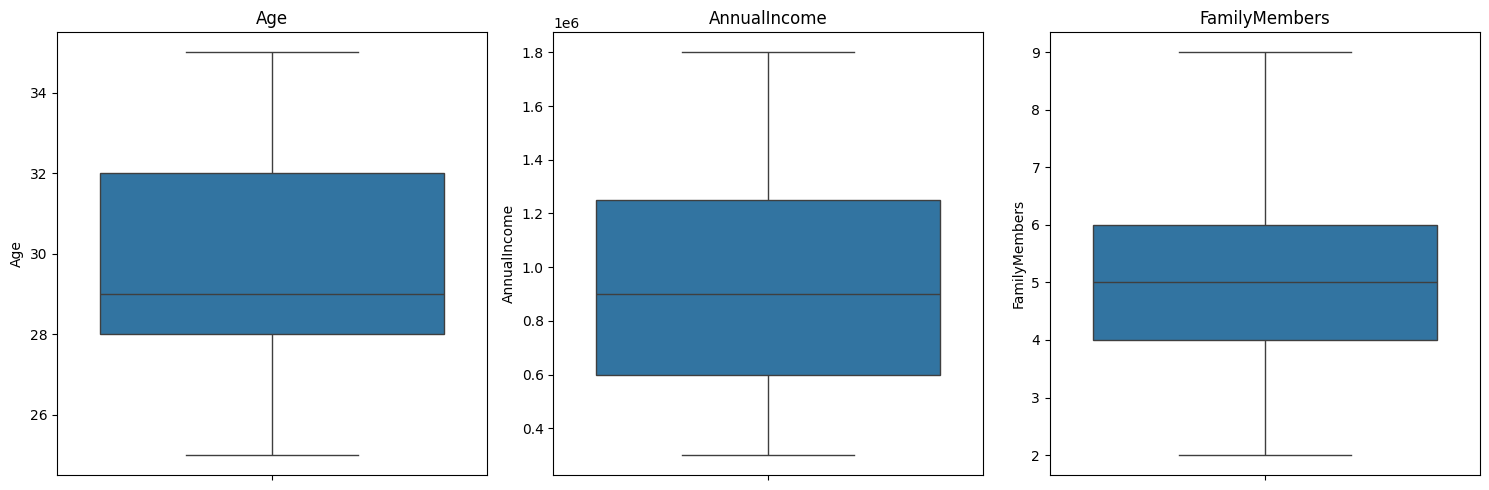

In [ ]:
num_cols = ['Age', 'AnnualIncome', 'FamilyMembers']

plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

## Preprocessing

In [ ]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.drop(df.columns[0], axis=1)
    return df

In [ ]:
df = preprocessing_data(df.copy())

## Feature Engineering

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


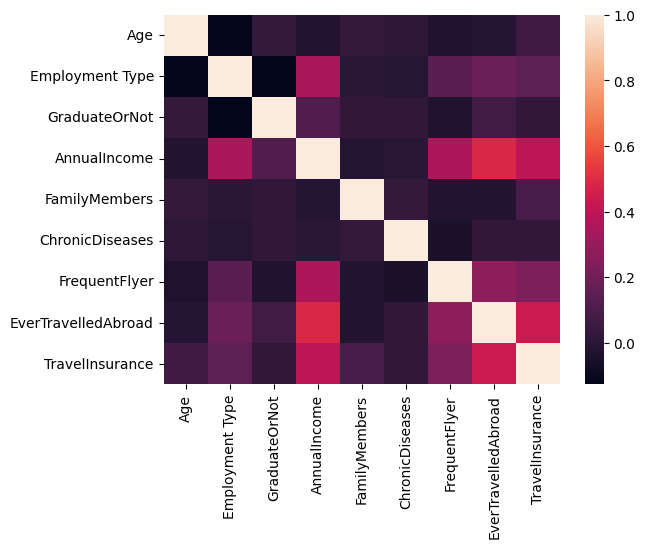

In [ ]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df = df.copy()
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category').cat.codes
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data
display(df.head())

In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('TravelInsurance', axis=1) # Todo: Select features
    y = df['TravelInsurance'] # Todo: Select label
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    return X, y

X, y = prepare_X_y(df)

X shape: (1987, 8)
y shape: (1987,)


# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    scaler = MinMaxScaler()
    gau_nb = GaussianNB()
    pipe = Pipeline(steps=[("scaler", scaler), ("gau_nb", gau_nb)])

    var_smoothing_values = np.logspace(-4, -9, num=100)
    param_grid = {
        "scaler__feature_range": [(-1, 1), (0, 1)],
        'gau_nb__var_smoothing': var_smoothing_values
    }

    search = GridSearchCV(pipe, param_grid, n_jobs=2, scoring='f1', cv=5)
    search.fit(X, y)

    print("Best parameters:", search.best_params_)
    print("Best F1 score:", search.best_score_)
    return search

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    print("precision", precision_score(y_true , y_pred))
    print("recall", recall_score(y_true , y_pred))
    print("accuracy", accuracy_score(y_true , y_pred))
    print("F1", f1_score(y_true , y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_true , y_pred))
    print("Classification report: \n", classification_report(y_true , y_pred))

    print("Main Score (Recall):")
    main_score = recall_score(y_true, y_pred)
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(testY, pred)
display(model)

Best parameters: {'gau_nb__var_smoothing': np.float64(0.0001), 'scaler__feature_range': (-1, 1)}
Best F1 score: 0.5984091938404583
precision 0.6851851851851852
recall 0.5
accuracy 0.7286432160804021
F1 0.578125
Confusion matrix: 
 [[324  51]
 [111 111]]
Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.86      0.80       375
           1       0.69      0.50      0.58       222

    accuracy                           0.73       597
   macro avg       0.72      0.68      0.69       597
weighted avg       0.72      0.73      0.72       597

Main Score (Recall):


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('gau_nb', GaussianNB())]),
             n_jobs=2,
             param_grid={'gau_nb__var_smoothing': array([1.00000000e-04, 8.90215085e-05, 7.92482898e-05, 7.05480231e-05,
       6.28029144e-05, 5.59081018e-05, 4.97702356e-05, 4.43062146e-05,
       3.94420606e-05, 3.51119173e-05, 3.12571585e-05, 2.78255940e-05,
       2.47707636e-05, 2.20513...
       9.11162756e-09, 8.11130831e-09, 7.22080902e-09, 6.42807312e-09,
       5.72236766e-09, 5.09413801e-09, 4.53487851e-09, 4.03701726e-09,
       3.59381366e-09, 3.19926714e-09, 2.84803587e-09, 2.53536449e-09,
       2.25701972e-09, 2.00923300e-09, 1.78864953e-09, 1.59228279e-09,
       1.41747416e-09, 1.26185688e-09, 1.12332403e-09, 1.00000000e-09]),
                         'scaler__feature_range': [(-1, 1), (0, 1)]},
             scoring='f1')

In [ ]:
print("-----------Test Performance-----------")
calculate_performance(testY, pred)
print("\n-----------Train Performance-----------")
calculate_performance(trainY, model.predict(trainX))

-----------Test Performance-----------
precision 0.6851851851851852
recall 0.5
accuracy 0.7286432160804021
F1 0.578125
Confusion matrix: 
 [[324  51]
 [111 111]]
Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.86      0.80       375
           1       0.69      0.50      0.58       222

    accuracy                           0.73       597
   macro avg       0.72      0.68      0.69       597
weighted avg       0.72      0.73      0.72       597

Main Score (Recall):

-----------Train Performance-----------
precision 0.7163323782234957
recall 0.5122950819672131
accuracy 0.7575539568345324
F1 0.5973715651135006
Confusion matrix: 
 [[803  99]
 [238 250]]
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       902
           1       0.72      0.51      0.60       488

    accuracy                           0.76      1390
   macro avg       0.74      0.70

0.5122950819672131

In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. " \
           "Other conclusion: "

7.
- Có thể cân nhắc chọn F1-score hoặc recall:
  -  Với F1-score: dữ liệu mất cân bằng (số người mua bảo hiểm ít hơn nhiều so với không mua), F1-score có thể giúp cân bằng giữa việc dự đoán đúng khách hàng mua bảo hiểm (recall) và hạn chế dự đoán nhầm (precision).
  - Với recall: nếu mục tiêu là không bỏ sót bất kỳ khách hàng tiềm năng nào (ưu tiên tiếp cận càng nhiều người có khả năng mua càng tốt).

- Scaler: sử dụng MinMaxScaler để chuẩn hóa các đặc trưng đầu vào. Tham số feature_range được tối ưu bằng GridSearchCV, và giá trị tốt nhất là (-1, 1).

- Dimensional Reduction: không apply vì số feature không quá lớn.

- Mô hình Naive Bayes và tham số: sử dụng GaussianNB (Gaussian Naive Bayes) làm mô hình phân loại. Tham số var_smoothing được tối ưu bằng GridSearchCV, giá trị tốt nhất là 0.0001.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import numpy as np

def build_model_with_pca(X, y):
    scaler = MinMaxScaler()
    pca = PCA()
    gau_nb = GaussianNB()
    pipe = Pipeline(steps=[
        ("scaler", scaler),
        ("pca", pca),
        ("gau_nb", gau_nb)
    ])

    var_smoothing_values = np.logspace(-4, -9, num=10)
    n_components = [2, 3, 4, 5, 6, 7, 8]

    param_grid = {
        "scaler__feature_range": [(-1, 1), (0, 1)],
        "pca__n_components": n_components,
        'gau_nb__var_smoothing': var_smoothing_values
    }

    search = GridSearchCV(pipe, param_grid, n_jobs=2, scoring='f1', cv=5)
    search.fit(X, y)

    print("Best parameters:", search.best_params_)
    print("Best F1 score:", search.best_score_)
    return search

model_with_pca = build_model_with_pca(trainX, trainY)

y_pred_pca = model_with_pca.predict(testX)
calculate_performance(testY, pred)
display(model)

Best parameters: {'gau_nb__var_smoothing': np.float64(0.0001), 'pca__n_components': 8, 'scaler__feature_range': (-1, 1)}
Best F1 score: 0.6172312001534526
precision 0.6851851851851852
recall 0.5
accuracy 0.7286432160804021
F1 0.578125
Confusion matrix: 
 [[324  51]
 [111 111]]
Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.86      0.80       375
           1       0.69      0.50      0.58       222

    accuracy                           0.73       597
   macro avg       0.72      0.68      0.69       597
weighted avg       0.72      0.73      0.72       597

Main Score (Recall):


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('gau_nb', GaussianNB())]),
             n_jobs=2,
             param_grid={'gau_nb__var_smoothing': array([1.00000000e-04, 8.90215085e-05, 7.92482898e-05, 7.05480231e-05,
       6.28029144e-05, 5.59081018e-05, 4.97702356e-05, 4.43062146e-05,
       3.94420606e-05, 3.51119173e-05, 3.12571585e-05, 2.78255940e-05,
       2.47707636e-05, 2.20513...
       9.11162756e-09, 8.11130831e-09, 7.22080902e-09, 6.42807312e-09,
       5.72236766e-09, 5.09413801e-09, 4.53487851e-09, 4.03701726e-09,
       3.59381366e-09, 3.19926714e-09, 2.84803587e-09, 2.53536449e-09,
       2.25701972e-09, 2.00923300e-09, 1.78864953e-09, 1.59228279e-09,
       1.41747416e-09, 1.26185688e-09, 1.12332403e-09, 1.00000000e-09]),
                         'scaler__feature_range': [(-1, 1), (0, 1)]},
             scoring='f1')